In [70]:
import sklearn
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
dataset=fetch_california_housing()
df=pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [71]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [73]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [74]:
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(df[['Population']])

df['Population'] = scaled_data
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,0.008941,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,0.067210,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,0.013818,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,0.015555,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,0.015752,2.181467,37.85,-122.25


In [75]:
max_age = df['HouseAge'].max()

In [76]:
bins = [1, 10, 30, max_age]

labels = ['new', 'old', 'very old']

df['Age_cat'] = pd.cut(df['HouseAge'], bins=bins, labels=labels)

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Age_cat
0,8.3252,41.0,6.984127,1.023810,0.008941,2.555556,37.88,-122.23,very old
1,8.3014,21.0,6.238137,0.971880,0.067210,2.109842,37.86,-122.22,old
2,7.2574,52.0,8.288136,1.073446,0.013818,2.802260,37.85,-122.24,very old
3,5.6431,52.0,5.817352,1.073059,0.015555,2.547945,37.85,-122.25,very old
4,3.8462,52.0,6.281853,1.081081,0.015752,2.181467,37.85,-122.25,very old


TypeError: 'value' must be an instance of str or bytes, not a float

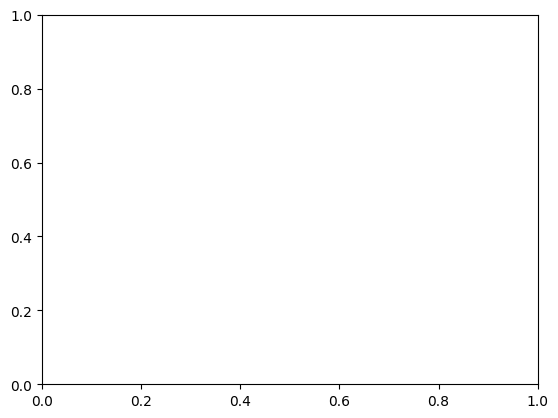

In [81]:
plt.hist(df['Age_cat'], bins=bins)
plt.show()

In [77]:


encoded_data = pd.get_dummies(df, columns = ['Age_cat'])


encoded_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Age_cat_new,Age_cat_old,Age_cat_very old
0,8.3252,41.0,6.984127,1.023810,0.008941,2.555556,37.88,-122.23,False,False,True
1,8.3014,21.0,6.238137,0.971880,0.067210,2.109842,37.86,-122.22,False,True,False
2,7.2574,52.0,8.288136,1.073446,0.013818,2.802260,37.85,-122.24,False,False,True
3,5.6431,52.0,5.817352,1.073059,0.015555,2.547945,37.85,-122.25,False,False,True
4,3.8462,52.0,6.281853,1.081081,0.015752,2.181467,37.85,-122.25,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,0.023599,2.560606,39.48,-121.09,False,True,False
20636,2.5568,18.0,6.114035,1.315789,0.009894,3.122807,39.49,-121.21,False,True,False
20637,1.7000,17.0,5.205543,1.120092,0.028140,2.325635,39.43,-121.22,False,True,False
20638,1.8672,18.0,5.329513,1.171920,0.020684,2.123209,39.43,-121.32,False,True,False


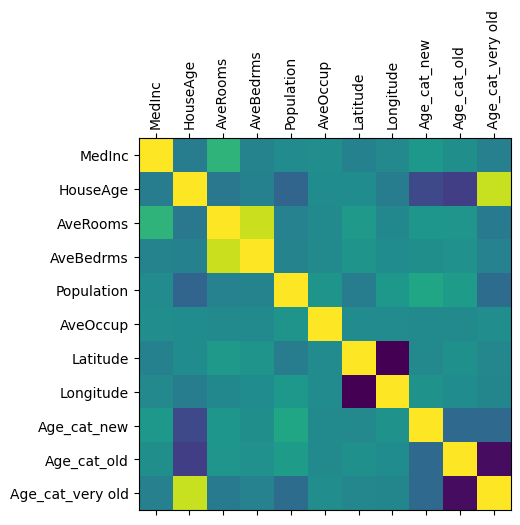

In [78]:
matrix = encoded_data.corr()

plt.matshow(matrix)
plt.xticks(range(len(matrix.columns)), matrix.columns, rotation='vertical')
plt.yticks(range(len(matrix.columns)), matrix.columns, rotation='horizontal')
plt.show()